In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

### The relation between companies' attributes and the average time a software engineer works on it.

<AxesSubplot:xlabel='companySize'>

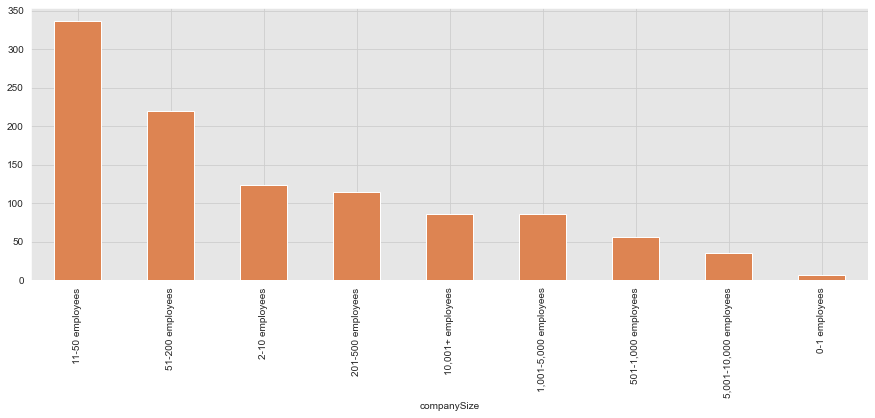

In [63]:
# read companies data
df_companies = pd.read_csv("../data/companies/companies.csv")

# select only the companySize, location, founded,industry,headquarters,query 
df_companies = df_companies[['companySize','location','founded','industry','headquarters','query']]
df_companies.head()

# remove na values in companySize
df_companies = df_companies.dropna(subset=['companySize'])

# plot the number of companies by companySize
df_companies.groupby('companySize').size().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color=sns_c[1])


<AxesSubplot:xlabel='location'>

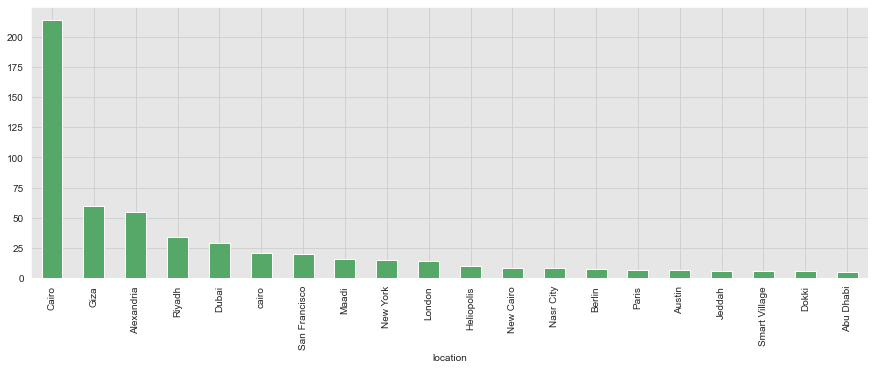

In [64]:
# plot the companies wrt location and show only first 20 results
df_companies.groupby('location').size().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15, 5), color=sns_c[2])

<AxesSubplot:xlabel='founded'>

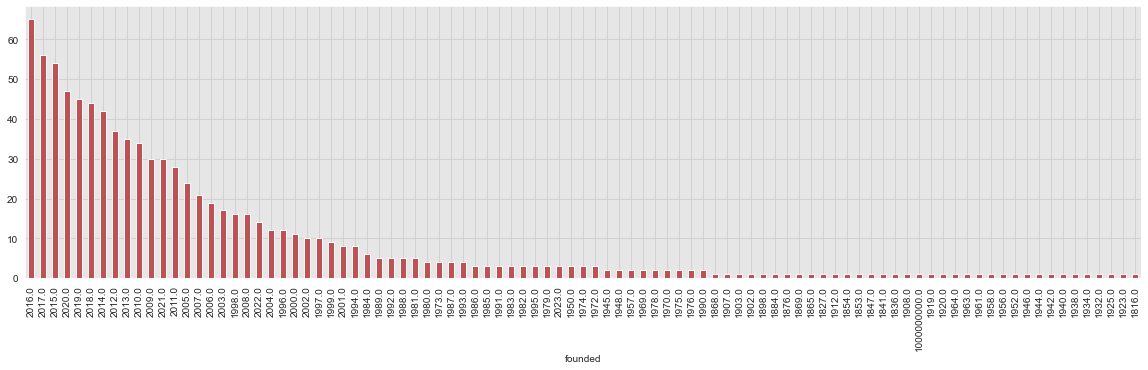

In [65]:
# plot company wrt founded year and show first 20 results
df_companies.groupby('founded').size().sort_values(ascending=False).plot(kind='bar', figsize=(20, 5), color=sns_c[3])

In [72]:
df_employees = pd.read_csv("../data/preprocessed-data/csv/experiences.csv")

# plot the head of the dataframe
df_employees.head()

# select only the CompanyUrl and the duration columns and EmploymentType
df_employees = df_employees[['CompanyUrl', 'Duration','EmploymentType']]

# remove na values in EmploymentType
df_employees = df_employees.dropna(subset=['EmploymentType','CompanyUrl','Duration'])

# change all values to lowercase
df_employees['EmploymentType'] = df_employees['EmploymentType'].str.lower()

# keep on EmployeeType which contains full-time, part-time, contract
df_employees = df_employees[df_employees['EmploymentType'].str.contains('full|part|contract')]

# head data
df_employees.head(10)

,CompanyUrl,Duration,EmploymentType
0,https://www.linkedin.com/company/294614/,9.0,full-time
4,https://www.linkedin.com/company/30101254/,16.0,full-time
5,https://www.linkedin.com/company/294614/,4.0,full-time
6,UNKNOWN,12.0,full-time
7,https://www.linkedin.com/company/777868/,12.0,full-time
8,https://www.linkedin.com/company/294614/,11.0,full-time
10,https://www.linkedin.com/company/18899346/,8.0,full-time
11,https://www.linkedin.com/company/85963270/,8.0,part-time
12,https://www.linkedin.com/company/3302698/,8.0,full-time
19,https://www.linkedin.com/company/623785/,16.0,full-time


In [73]:
# combine the CompanyUrl with the df_companies dataframe
df_employees = df_employees.merge(df_companies, left_on='CompanyUrl', right_on='query')

# show the head of the dataframe
df_employees.head()

,CompanyUrl,Duration,EmploymentType,companySize,location,founded,industry,headquarters,query
0,https://www.linkedin.com/company/294614/,9.0,full-time,201-500 employees,Giza,1993.0,Professional Training and Coaching,NaN,https://www.linkedin.com/company/294614/
1,https://www.linkedin.com/company/294614/,4.0,full-time,201-500 employees,Giza,1993.0,Professional Training and Coaching,NaN,https://www.linkedin.com/company/294614/
2,https://www.linkedin.com/company/294614/,11.0,full-time,201-500 employees,Giza,1993.0,Professional Training and Coaching,NaN,https://www.linkedin.com/company/294614/
3,https://www.linkedin.com/company/294614/,18.0,full-time,201-500 employees,Giza,1993.0,Professional Training and Coaching,NaN,https://www.linkedin.com/company/294614/
4,https://www.linkedin.com/company/294614/,9.0,full-time,201-500 employees,Giza,1993.0,Professional Training and Coaching,NaN,https://www.linkedin.com/company/294614/


<AxesSubplot:title={'center':'Employee Count VS Company Size'}, xlabel='companySize'>

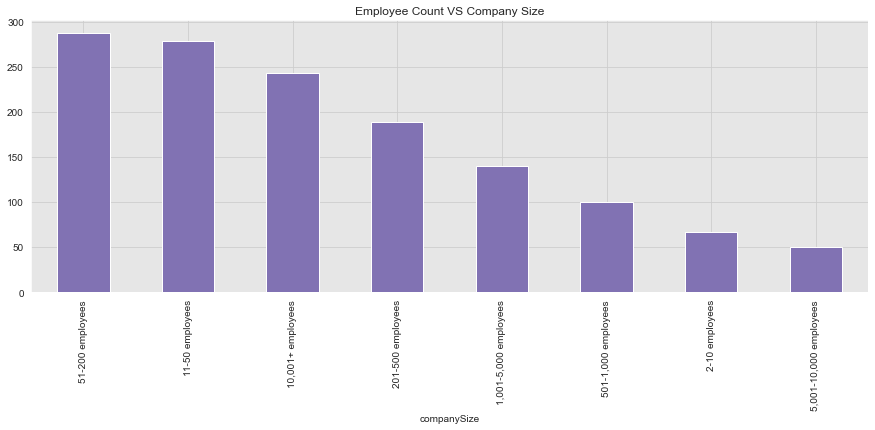

In [78]:
#count number of employees by companySize
df_employees.groupby('companySize').size().sort_values(ascending=False).plot(title="Employee Count VS Company Size",kind='bar', figsize=(15, 5), color=sns_c[4])

<AxesSubplot:title={'center':'Duration VS CompanySize'}, xlabel='companySize'>

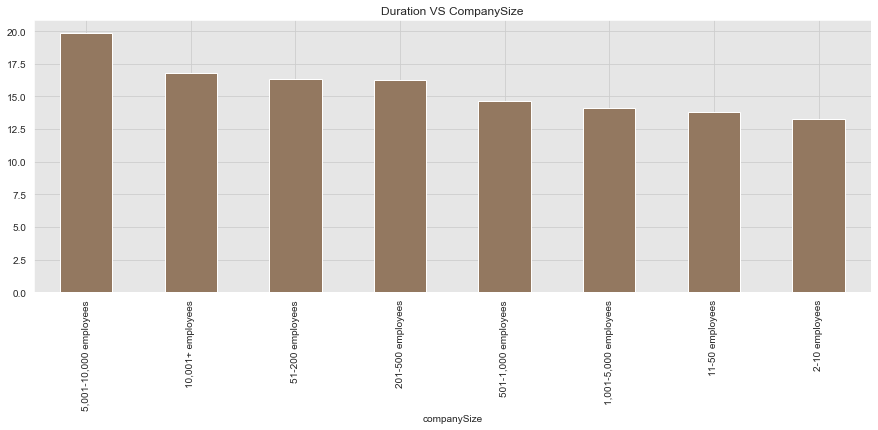

In [80]:
# average duration by companySize
df_employees.groupby('companySize')['Duration'].mean().sort_values(ascending=False).plot(title="Duration VS CompanySize",kind='bar', figsize=(15, 5), color=sns_c[5])

<AxesSubplot:title={'center':'Duration VS Company Industry'}, xlabel='industry'>

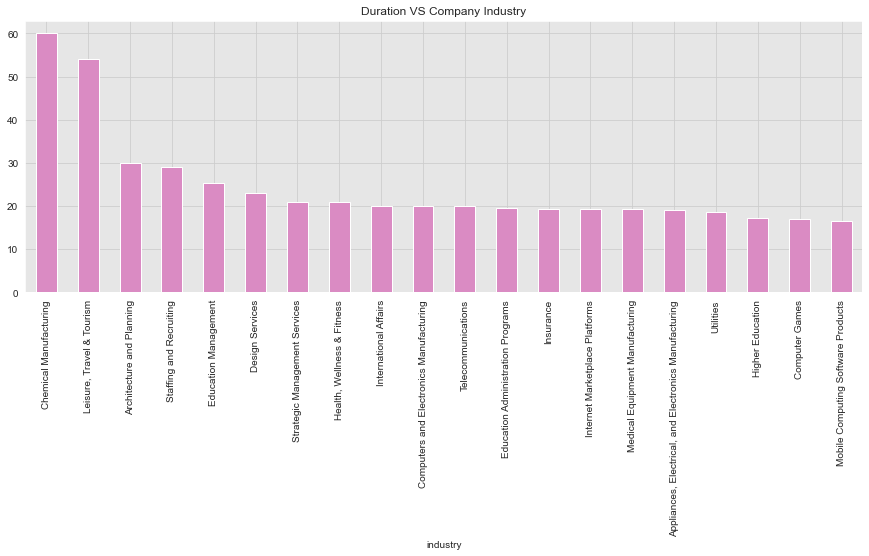

In [83]:
# average duration by industry
df_employees.groupby('industry')['Duration'].mean().sort_values(ascending=False)[:20].plot(title="Duration VS Company Industry",kind='bar', figsize=(15, 5), color=sns_c[6])

<AxesSubplot:title={'center':'Founded Year VS Duration'}, xlabel='founded'>

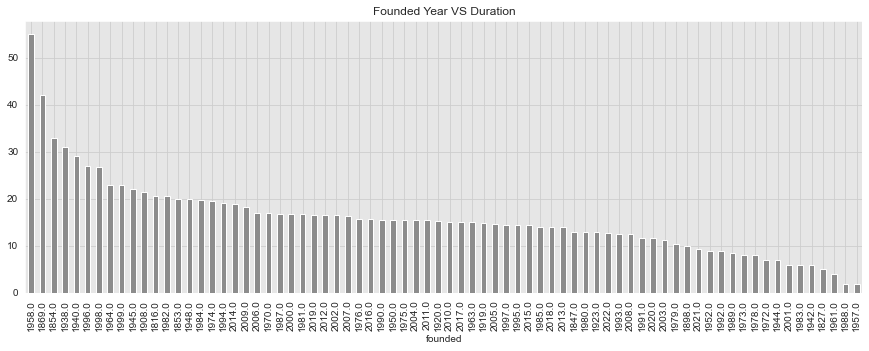

In [85]:
# average duration by location
df_employees.groupby('founded')['Duration'].mean().sort_values(ascending=False).plot(title="Founded Year VS Duration",kind='bar', figsize=(15, 5), color=sns_c[7])